In [1]:
import polars as pl

DATA_PATH = "../../data/"
train = pl.read_csv(DATA_PATH + "train.csv")

In [22]:
train = train.with_columns(
    pl.col("full_text").str.len_chars().alias("text_length"),
    pl.col("full_text")
    .map_elements(lambda x: len(x.split()), return_dtype=pl.Int64)
    .alias("word_length"),
)

In [26]:
train

essay_id,full_text,score,text_length,word_length
str,str,i64,u32,i64
"""000d118""","""Many people have car where the…",3,2677,498
"""000fe60""","""I am a scientist at NASA that …",3,1669,332
"""001ab80""","""People always wish they had th…",4,3077,550
"""001bdc0""","""We all heard about Venus, the …",4,2701,451
"""002ba53""","""Dear, State Senator This is a…",3,2208,373
…,…,…,…,…
"""ffd378d""","""the story "" The Challenge of E…",2,856,157
"""ffddf1f""","""Technology has changed a lot o…",4,3354,579
"""fff016d""","""If you don't like sitting arou…",2,1122,215


In [23]:
import seaborn as sns

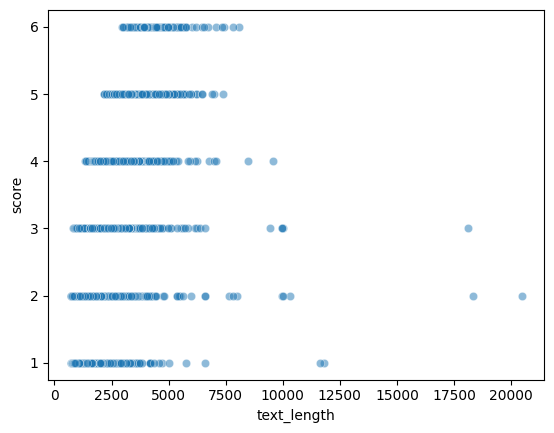

In [25]:
sns.scatterplot(train.to_pandas(), x="text_length", y="score", alpha=0.5)

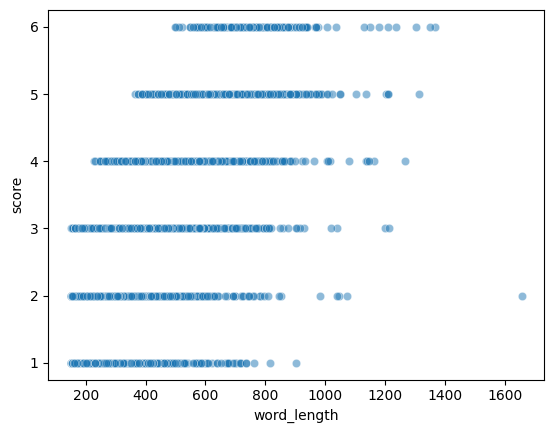

In [27]:
sns.scatterplot(train.to_pandas(), x="word_length", y="score", alpha=0.5)

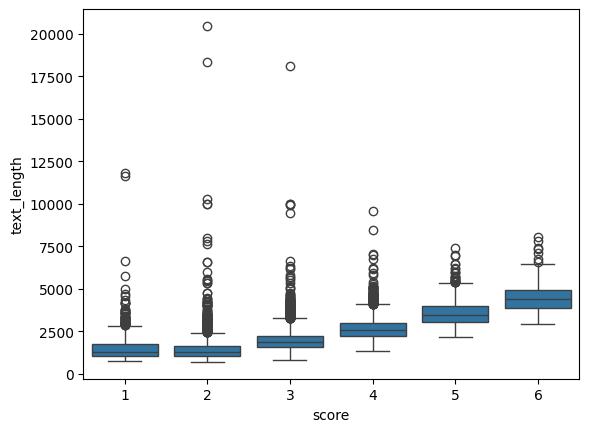

In [20]:
sns.boxplot(train.to_pandas(), x="score", y="text_length")

<Axes: xlabel='score', ylabel='word_length'>

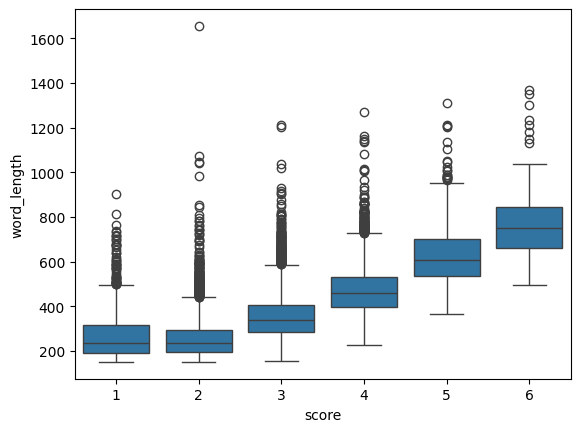

In [28]:
sns.boxplot(train.to_pandas(), x="score", y="word_length")